In [1]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")

Datos obtenidos exitosamente


In [3]:
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

In [4]:
accidentes_data = pd.DataFrame(rows)
accidentes_data.head(5)

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,1115,A001390689,10563353.0,1644814800000,19:30:00,2022.0,FEBRERO,LUNES,DG 73 G - KR 79 A S 02,CON HERIDOS,ATROPELLO,BOSA,BOGOTA DC,1644885000000,4.607566,-74.201473,7005634.0,NaN
1,1116,A00410350,305198.0,1220850000000,08:20:00,2008.0,SEPTIEMBRE,LUNES,TR 52-1B 02,CON MUERTOS,CHOQUE,PUENTE ARANDA,BOGOTA DC,1220880000000,4.610252,-74.118635,16002240.0,236515.0
2,1117,A000757293,4506419.0,1516856400000,21:20:00,2018.0,ENERO,JUEVES,CL 52-KR 13A S 2,CON HERIDOS,CHOQUE,TUNJUELITO,BOGOTA DC,1516933200000,4.563616,-74.126296,6001458.0,132217.0
3,1118,727366900,36373.0,1188277200000,07:30:00,2007.0,AGOSTO,MARTES,AC 116-70H 0,SOLO DANOS,CHOQUE,SUBA,BOGOTA DC,1188304200000,4.699019,-74.076723,11010946.0,50015042.0
4,1119,A1061345,428805.0,1337058000000,05:50:00,2012.0,MAYO,MARTES,CL 26-KR 79A S 02,SOLO DANOS,CHOQUE,KENNEDY,BOGOTA DC,1337079000000,4.629726,-74.152551,8004631.0,231633.0


In [5]:
accidentes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              2000 non-null   int64  
 1   FORMULARIO            2000 non-null   object 
 2   CODIGO_ACCIDENTE      2000 non-null   float64
 3   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 4   HORA_OCURRENCIA_ACC   2000 non-null   object 
 5   ANO_OCURRENCIA_ACC    2000 non-null   float64
 6   MES_OCURRENCIA_ACC    2000 non-null   object 
 7   DIA_OCURRENCIA_ACC    2000 non-null   object 
 8   DIRECCION             2000 non-null   object 
 9   GRAVEDAD              2000 non-null   object 
 10  CLASE_ACC             2000 non-null   object 
 11  LOCALIDAD             2000 non-null   object 
 12  MUNICIPIO             2000 non-null   object 
 13  FECHA_HORA_ACC        2000 non-null   int64  
 14  LATITUD               2000 non-null   float64
 15  LONGITUD             

In [6]:
accidentes_data.isna().sum()

OBJECTID                  0
FORMULARIO                0
CODIGO_ACCIDENTE          0
FECHA_OCURRENCIA_ACC      0
HORA_OCURRENCIA_ACC       0
ANO_OCURRENCIA_ACC        0
MES_OCURRENCIA_ACC        0
DIA_OCURRENCIA_ACC        0
DIRECCION                 0
GRAVEDAD                  0
CLASE_ACC                 0
LOCALIDAD                 0
MUNICIPIO                 0
FECHA_HORA_ACC            0
LATITUD                   0
LONGITUD                  0
CIV                     713
PK_CALZADA              823
dtype: int64

In [7]:
accidentes_data.drop(columns=['PK_CALZADA'],inplace=True) # Información que cuenta con demasiados valores nulos

In [8]:
accidentes_data.drop(columns=['CIV'],inplace=True) # Información que no es relevante para el análisis

In [9]:
accidentes_data.isna().sum()    

OBJECTID                0
FORMULARIO              0
CODIGO_ACCIDENTE        0
FECHA_OCURRENCIA_ACC    0
HORA_OCURRENCIA_ACC     0
ANO_OCURRENCIA_ACC      0
MES_OCURRENCIA_ACC      0
DIA_OCURRENCIA_ACC      0
DIRECCION               0
GRAVEDAD                0
CLASE_ACC               0
LOCALIDAD               0
MUNICIPIO               0
FECHA_HORA_ACC          0
LATITUD                 0
LONGITUD                0
dtype: int64

In [10]:
# Reemplazar cadenas vacías o espacios con NaN
accidentes_data.replace(["", " ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
accidentes_data.dropna(inplace=True)

In [11]:
accidentes_data.dropna()
accidentes_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              2000 non-null   int64  
 1   FORMULARIO            2000 non-null   object 
 2   CODIGO_ACCIDENTE      2000 non-null   float64
 3   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 4   HORA_OCURRENCIA_ACC   2000 non-null   object 
 5   ANO_OCURRENCIA_ACC    2000 non-null   float64
 6   MES_OCURRENCIA_ACC    2000 non-null   object 
 7   DIA_OCURRENCIA_ACC    2000 non-null   object 
 8   DIRECCION             2000 non-null   object 
 9   GRAVEDAD              2000 non-null   object 
 10  CLASE_ACC             2000 non-null   object 
 11  LOCALIDAD             2000 non-null   object 
 12  MUNICIPIO             2000 non-null   object 
 13  FECHA_HORA_ACC        2000 non-null   int64  
 14  LATITUD               2000 non-null   float64
 15  LONGITUD             

In [12]:
accidentes_data['MUNICIPIO'].value_counts()
accidentes_data.drop(columns=['MUNICIPIO'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá

In [14]:
accidentes_data.drop(columns=['OBJECTID','FECHA_HORA_ACC'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá
accidentes_data.head(5)

,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001390689,10563353.0,1644814800000,19:30:00,2022.0,FEBRERO,LUNES,DG 73 G - KR 79 A S 02,CON HERIDOS,ATROPELLO,BOSA,4.607566,-74.201473
1,A00410350,305198.0,1220850000000,08:20:00,2008.0,SEPTIEMBRE,LUNES,TR 52-1B 02,CON MUERTOS,CHOQUE,PUENTE ARANDA,4.610252,-74.118635
2,A000757293,4506419.0,1516856400000,21:20:00,2018.0,ENERO,JUEVES,CL 52-KR 13A S 2,CON HERIDOS,CHOQUE,TUNJUELITO,4.563616,-74.126296
3,727366900,36373.0,1188277200000,07:30:00,2007.0,AGOSTO,MARTES,AC 116-70H 0,SOLO DANOS,CHOQUE,SUBA,4.699019,-74.076723
4,A1061345,428805.0,1337058000000,05:50:00,2012.0,MAYO,MARTES,CL 26-KR 79A S 02,SOLO DANOS,CHOQUE,KENNEDY,4.629726,-74.152551


In [ ]:
accidentes_data['CLASE_ACC'].value_counts()

CLASE_ACC
CHOQUE               399479
ATROPELLO             55531
CAIDA DE OCUPANTE     10902
VOLCAMIENTO            6447
OTRO                   5509
AUTOLESION             2223
INCENDIO                 49
Name: count, dtype: int64

In [ ]:
accidentes_data['GRAVEDAD'].value_counts()

GRAVEDAD
SOLO DANOS     295697
CON HERIDOS    176302
CON MUERTOS      8141
Name: count, dtype: int64

array([[<Axes: title={'center': 'CODIGO_ACCIDENTE'}>,
        <Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>],
       [<Axes: title={'center': 'LATITUD'}>,
        <Axes: title={'center': 'LONGITUD'}>]], dtype=object)

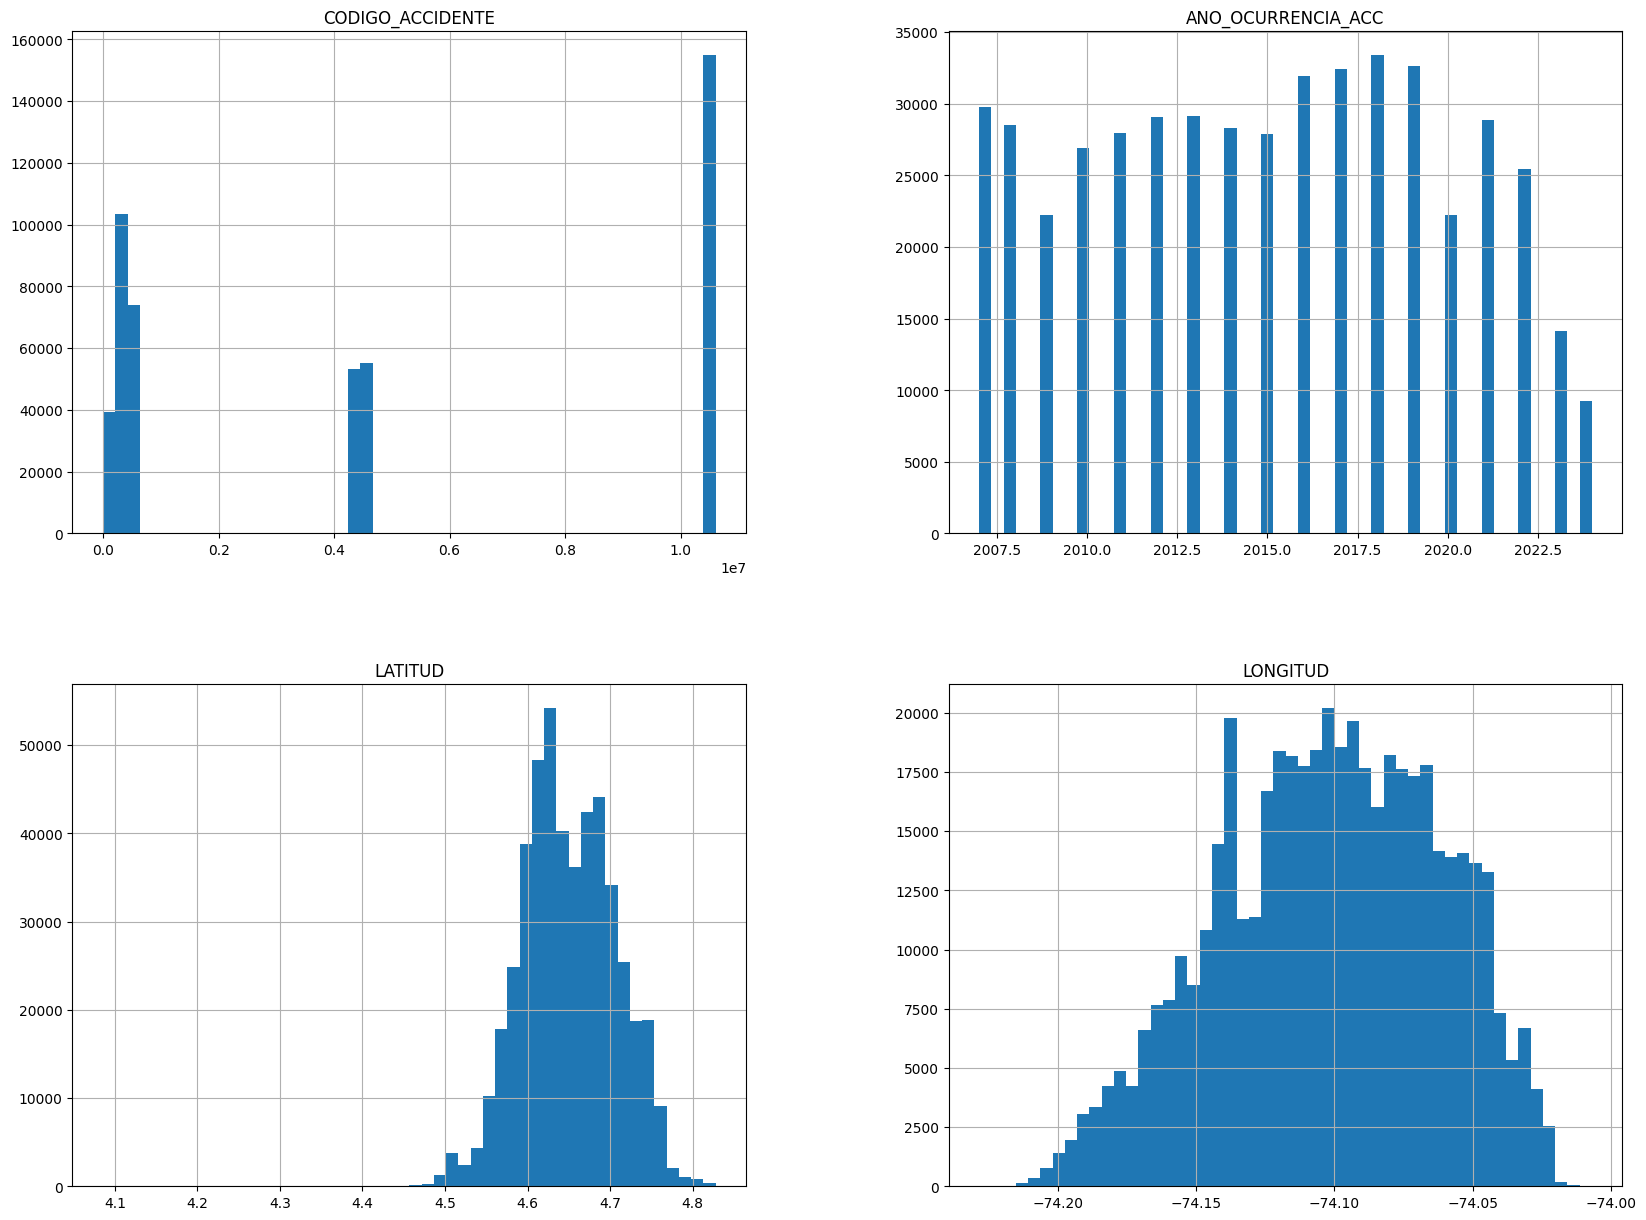

In [ ]:
accidentes_data.hist(bins=50, figsize=(20,15)) #Plots a histogram of the numerical attributes
# Importante. Graficar aquellos que tienen sentido análizar en un histograma

array([[<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>]], dtype=object)

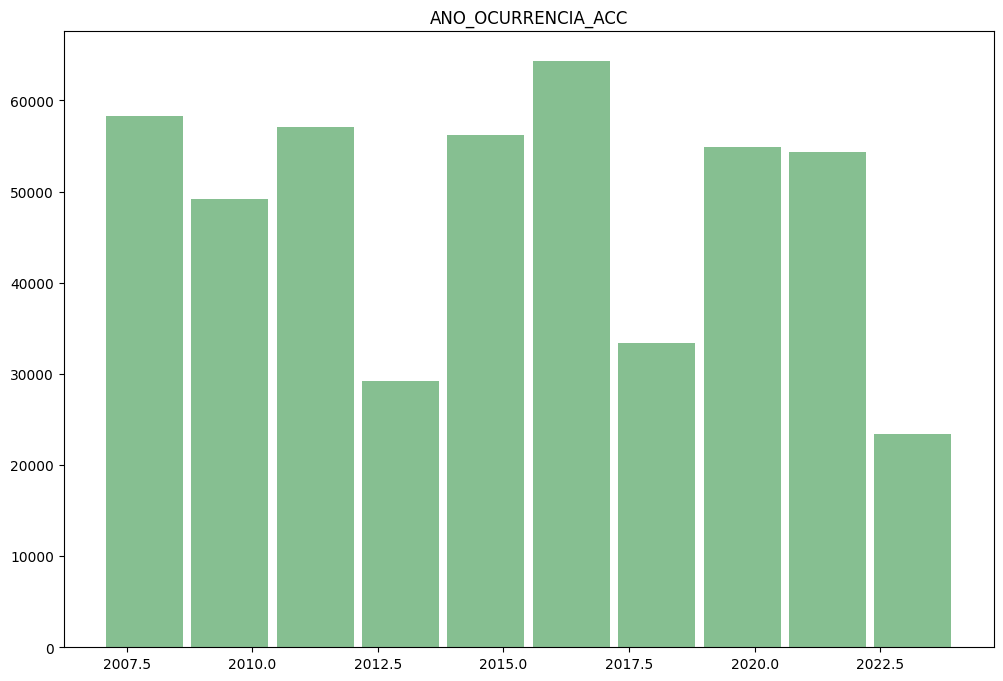

In [ ]:
accidentes_data.hist(column='ANO_OCURRENCIA_ACC', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

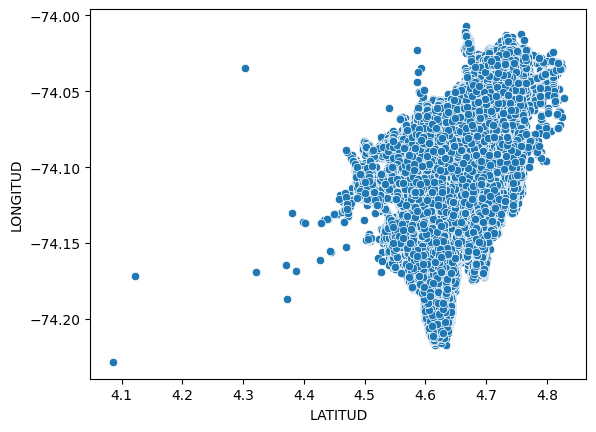

In [ ]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

c:\Users\laura\OneDrive\Documentos\GitHub\Proyecto_Analisis_BD\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\laura\OneDrive\Documentos\GitHub\Proyecto_Analisis_BD\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


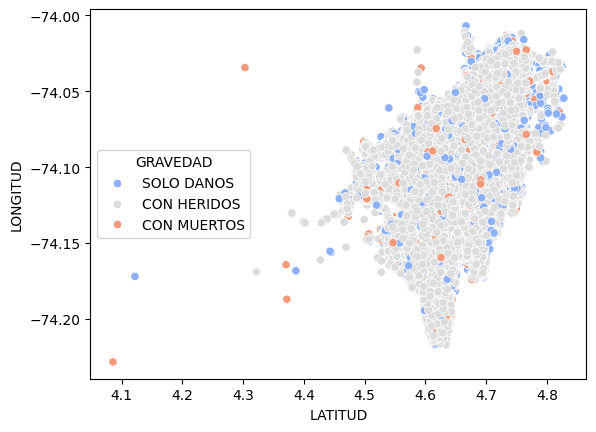

In [ ]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "GRAVEDAD", palette = "coolwarm")

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

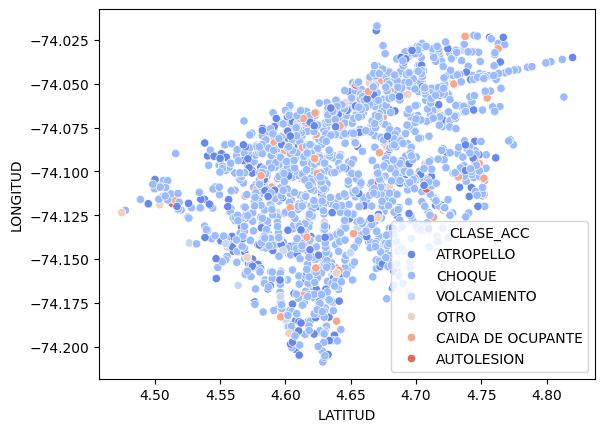

In [15]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "CLASE_ACC", palette = "coolwarm")